### Determine the optimal K number
* Elbow method
* Average silhouette method: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# Use a smaller data set to save time
df = pd.read_csv('PHBsample14_sss.csv', low_memory=False)

In [3]:
# drop the column resulted from sampling of the original data set
df.drop('Unnamed: 0', axis=1, inplace=True)
# In order to run K-means, drop all the categoricald data for now.
df = df.select_dtypes(include=['float64', 'int64'])
# Impute missing values with means
df = df.fillna(df.mean())

In [4]:
pca = PCA(2, svd_solver='randomized')
pca.fit(df)
df_reduced = pca.fit_transform(df)
df_reduced = StandardScaler().fit_transform(df_reduced)

In [5]:
X = df_reduced

00:04:17.51


Text(0.5,1,'Variance Explained vs. k')

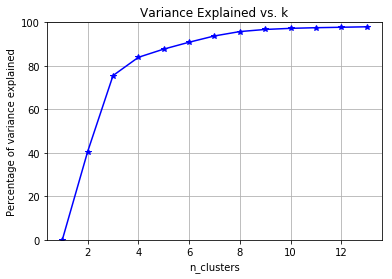

In [7]:
# Reference: https://github.com/sarguido/k-means-clustering/blob/master/k-means-clustering.ipynb
import time
start = time.time()
# Determine your k range
k_range = range(1,14)

# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(n_clusters=k).fit(X) for k in k_range]

# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid = [cdist(X, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# The total sum of squares
tss = sum(pdist(X)**2)/X.shape[0]

# The between-cluster sum of squares
bss = tss - wcss

end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('n_clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs. k')

In [8]:
fig.savefig('OptimalK_elbum.png', dpi=100)